In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.max_columns', None)

In [352]:
rates_2019 = pd.read_excel('Datasets/archive.xlsx', header=0,sheet_name='2019 Archive')
rates_2019

# melt_rates = rates_2019.melt(id_vars=["12/30/19-1/5/20"],
#         var_name= "Savings",
#         value_name="Date")
# melt_rates

,,12/30/19-1/5/20,12/30/19-1/5/20.1,12/23/19-12/29/19,12/23/19-12/29/19.1,12/16/19-12/22/19,12/16/19-12/22/19.1,12/9/19-12/15/19,12/9/19-12/15/19.1,12/2/19-12/8/19,12/2/19-12/8/19.1,11/25/19-12/1/19,11/25/19-12/1/19.1,11/18/19-11/24/19,11/18/19-11/24/19.1,11/11/19-11/17/19,11/11/10-11/17/19,11/4/19-11/10/19,11/4/19-11/10/19.1,10/28/19-11/3/19,10/28/19-11/3/19.1,10/21/19-10/27/19,10/21/19-10/27/19.1,10/14/19-10/20/19,10/14/19-10/20/19.1,10/7/19-10/13/19,10/7/19-10/13/19.1,9/30/19-10/6/19,9/30/19-10/6/19.1,9/23/19-9/29/19,9/23/19-9/29/19.1,9/16/19-9/22/19,9/16/19-9/22/19.1,9/9/19-9/15/19,9/9/19-9/15/19.1,9/2/19-9/8/19,9/2/19-9/8/19.1,8/19/26-9/1/19,8/19/26-9/1/19.1,8/19/19-8/25/19,8/19/19-8/25/19.1,8/12/19-8/18/19,8/12/19-8/18/19.1,8/5/19-8/11/19,8/5/19-8/11/19.1,7/29/19-8/4/19,7/29/19-8/4/19.1,7/22/19-7/28/19,7/22/19-7/28/19.1,7/15/19-7/21/19,7/15/19-7/21/19.1,7/8/19-7/14/19,7/8/19-7/14/19.1,7/1/19-7/7/19,7/1/19-7/7/19.1,6/24/19-6/30/19,6/24/19-6/30/19.1,6/17/19-6/23/19,6/17/19-6/23/19.1,6/10/19-6/16/19,6/10/19-6/16/19.1,6/3/19-6/9/19,6/3/19-6/9/19.1,5/27/19-6/2/2019,5/27/19-6/2/2019.1,5/20/19-5/26/19,5/20/19-5/26/19.1,5/13/19-5/19/19,5/13/19-5/19/19.1,5/6/19-5/12/19,5/6/19-5/12/19.1,4/29/19-5/5/19,4/29/19-5/5/19.1,4/22/19-4/28/19,4/22/19-4/28/19.1,4/15/19-4/21/19,4/15/19-4/21/19.1,4/8/19--4/14/19,4/8/19--4/14/19.1,4/1/19-4/7/19,4/1/19-4/7/19.1,3/25/19-3/31/19,3/25/19-3/31/19.1,3/18/19-3/24/19,3/18/19-3/24/19.1,3/11/19-3/17/19,3/11/19-3/17/19.1,3/4/19-3/10/19,3/4/19-3/10/19.1,2/25/19-3/3/19,2/25/19-3/3/19.1,2/18/19-2/24/19,2/18/19-2/24/19.1,2/11/19-2/17/19,2/11/19-2/17/19.1,2/4/19-2/10/19,2/4/19-2/10/19.1,1/28/19-2/3/19,1/28/19-2/3/19.1,1/21/19-1/27/19,1/21/19-1/27/19.1,1/14/19-1/20/19,1/14/19-1/20/19.1,1/7/19-1/13/19,1/7/19-1/13/19.1
0,NaN,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap,National Rate,National Rate Cap
1,Non-Jumbo Deposits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savings,0.09,0.84,0.09,0.84,0.09,0.84,0.09,0.84,0.09,0.84,0.09,0.84,0.09,0.84,0.09,0.84,0.09,0.84,0.09,0.84,0.09,0.84,0.09,0.84

## Total Deposits Q2 2020

Most updated report by FDIC

In [135]:
fdic = pd.read_csv('All_Reports_20200630_Total Deposits.csv')
fdic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cert             5075 non-null   int64  
 1   docket           5075 non-null   int64  
 2   fed_rssd         5075 non-null   int64  
 3   rssdhcr          4142 non-null   float64
 4   name             5075 non-null   object 
 5   city             5075 non-null   object 
 6   stalp            5075 non-null   object 
 7   zip              5075 non-null   int64  
 8   repdte           5075 non-null   object 
 9   rundate          5075 non-null   object 
 10  bkclass          5075 non-null   object 
 11  address          5075 non-null   object 
 12  namehcr          4142 non-null   object 
 13  offdom           5075 non-null   int64  
 14  offfor           5075 non-null   int64  
 15  stmult           5075 non-null   int64  
 16  specgrp          5075 non-null   int64  
 17  subchaps      

In [322]:
fdic

,cert,docket,fed_rssd,rssdhcr,name,city,state,zip,repdte,rundate,bkclass,address,namehcr,offdom,offfor,stmult,specgrp,subchaps,county,cbsa_metro,cbsa_metro_name,estymd,insdate,effdate,mutual,parcert,trust,regagnt,insagnt1,fdicdbs,fdicsupv,fldoff,fed,occdist,otsregnm,offoa,Community_Banks,inst.webaddr,Total_Deposits,depdom,idtrni,idtrngov,idtrnmu,idtrcomb,idtrnfc,idtrnfg,depfor,Transaction_Accounts,Demand_Deposit,Non-Transaction_Accounts,Money_Market_Deposit_Accounts,Other_Savings_Accounts,Time_Deposits,Time_and_Savings_Deposits,Non-Interest_Bearing,Interest-Bearing,Retail_Deposits,depins,irakeogh,bro,broins,DEPLSNB
0,4829,0,746223,2706726.0,1880 BANK,Cambridge,MD,21613,6/30/2020,8/17/2020,SM,304 High St.,DELMARVA BANCSHARES INC,6,0,0,4,0,Dorchester,NaN,NaN,1/1/1880,1/1/1934,7/16/2015,Stock,0,1,FED,DIF,New York,NEW YORK,Baltimore,Richmond,Northeastern,Southeast,0,1,www.1880bank.com,338171,338171,289482,3,48686,0,0,0,NaN,161620,114293.0,176551,41717.0,70974.0,63860.0,223878.0,113170.0,225001.0,324433.0,247628,12126.0,0.0,0.0,0.0
1,57899,0,3317192,4526496.0,1ST ADVANTAGE BANK,Saint Peters,MO,63376,6/30/2020,8/17/2020,NM,240 Salt Lick Rd.,BANC INVESTORS LLC,1,0,0,4,0,Saint Charles,41180.0,"St. Louis, MO-IL",1/31/2005,1/31/2005,9/10/2010,Stock,0,0,FDIC,DIF,Kansas City,KANSAS CITY,St. Louis,St. louis,Western,West,0,1,www.1stadvantagebank.com,102742,102742,97000,0,25,5717,0,0,NaN,37071,32776.0,65671,22209.0,2251.0,41211.0,69966.0,34295.0,68447.0,92727.0,76459,2511.0,0.0,0.0,4170.0
2,22039,0,564856,1128415.0,1ST BANK,Broadus,MT,59317,6/30/2020,8/17/2020,SM,201 N. Wilbur Ave,1ST UNITED BCORP INC,1,0,0,2,1,Powder River,NaN,NaN,6/9/1975,6/9/1975,2/23/2018,Stock,0,0,FED,DIF,San Francisco,SAN FRANCISCO,Billings,Minneapolis,Western,West,0,1,www.our1stbank.com,46828,46828,45265,0,1562,0,0,0,NaN,21727,9385.0,25100,10308.0,6847.0,7945.0,37442.0,10327.0,36501.0,45330.0,40462,748.0,0.0,0.0,0.0
3,4122,0,350657,NaN,1ST BANK IN HOMINY,Hominy,OK,74035,6/30/2020,8/17/2020,SM,117 N. Price,NaN,1,0,0,8,1,Osage,46140.0,"Tulsa, OK",4/12/1906,1/1/1934,7/19/2019,Stock,0,0,FED,DIF,Dallas,DALLAS,Oklahoma City,Kansas City,Southern,West,0,1,http://www.1stbankhominy.com,38574,38574,31273,0,7301,0,0,0,NaN,14944,8260.0,23630,2873.0,5692.0,15064.0,30314.0,8260.0,30314.0,36363.0,35013,2108.0,0.0,0.0,0.0
4,30367,5236,148470,3848427.0,1ST BANK OF SEA ISLE CITY,Sea Isle City,NJ,8243,6/30/2020,8/17/2020,SB,4301 Landis Ave.,SEA ISLE FINANCIAL CORP MHC,3,0,0,5,0,Cape May,36140.0,"Ocean City, NJ",1/1/1882,11/30/1948,9/19/2014,Stock,0,0,FDIC,DIF,New York,NEW YORK,Jamesburg,Philadelphia,Northeastern,Northeast,0,1,www.1stbankseaisle.com,227284,227284,189837,0,37430,17,0,0,NaN,100510,61069.0,126774,696.0,97664.0,28414.0,166215.0,58605.0,168679.0,216503.0,159623,6181.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,24342,53060,522856,4419534.0,YORKTOWN BANK,Pryor,OK,74361,6/30/2020,8/17/2020,NM,1913 S. Elliott,YORKTOWN FINL HOLDINGS INC,3,0,0,4,0,Mayes,NaN,NaN,1/24/1983,1/24/1983,1/28/2019,Stock,0,0,FDIC,DIF,Dallas,DALLAS,Oklahoma City,Kansas City,Southern,West,0,1,www.yorktownbank.com,89968,89968,84351,0,4472,1145,0,0,NaN,36160,30900.0,53808,29316.0,3190.0,21302.0,59068.0,29663.0,60305.0,85969.0,68628,1588.0,0.0,0.0,2898.0
5071,27010,0,67254,1840883.0,YOUNG AMERICANS BANK,Denver,CO,80206,6/30/2020,8/17/2020,NM,3550 E. 1st Ave.,YOUNG AMERICANS EDUCATION FOUNDATION,3,0,0,7,0,Denver,19740.0,"Denver-Aurora-Lakewood, CO",8/3/1987,8/3/1987,3/31/2006,Stock,0,0,FDIC,DIF,Dallas,DALLAS,Denver,Kansas City,Western,Western,0,1,https://www.yacenter.org,19521,19521,19521,0,0,0,0,0,NaN,3243,3243.0,16278,0.0,14940.0,1338.0,16278.0,3365.0,16156.0,19521.0,17966,0.0,0.0,0.0,0.0
5072,18454,0,218261,1107223.0,ZAPATA NATIONAL BANK,Zapata,TX,78076,6/30/2020,8/17/2020,N,703 Hidalgo B

## Time Deposits Q2 2020

In [306]:
time_dep_q22020 = pd.read_csv('Datasets/All_Reports_20200630_Time Deposits at the $250,000 Threshold.csv')

time_dep_q22020.drop(time_dep_q22020.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q22020.drop(time_dep_q22020.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q22020.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q22020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5075 non-null   int64  
 1   name          5075 non-null   object 
 2   city          5075 non-null   object 
 3   state         5075 non-null   object 
 4   zip           5075 non-null   int64  
 5   cb            5075 non-null   int64  
 6   inst.webaddr  4946 non-null   object 
 7   NTRCDSM       5066 non-null   float64
 8   NTRTMMED      5066 non-null   float64
 9   IDcd3less     5066 non-null   float64
 10  IDcd3t12s     5066 non-null   float64
 11  IDcd1t3s      5066 non-null   float64
 12  IDcdov3s      5066 non-null   float64
 13  NTRTMLGJ      5066 non-null   float64
 14  IDcd3les      5066 non-null   float64
 15  IDcd3t12      5066 non-null   float64
 16  Idcd1t3       5066 non-null   float64
 17  IDcdov3       5066 non-null   float64
dtypes: float64(11), int64(3), ob

In [210]:
fdic.rename(columns={'dep': 'Total_Deposits', 'ntrtime': 'Time_Deposits', 'depidom': 'Interest-Bearing', 'depnidom': 'Non-Interest_Bearing', 'ts': 'Time_and_Savings_Deposits', 'ddt': 'Demand_Deposit', 'trn': 'Transaction_Accounts', 'ntr': 'Non-Transaction_Accounts', 'ntrsmmda': 'Money_Market_Deposit_Accounts', 'coredep': 'Retail_Deposits', 'ntrsoth': 'Other_Savings_Accounts', 'cb': 'Community_Banks', 'stalp': 'state'}, inplace=True)

fdic.drop(columns = ['depnifor', 'depifor'], inplace=True)

#fdic.drop(columns = ['depfor'], inplace=True)

fdic


,cert,docket,fed_rssd,rssdhcr,name,city,state,zip,repdte,rundate,bkclass,address,namehcr,offdom,offfor,stmult,specgrp,subchaps,county,cbsa_metro,cbsa_metro_name,estymd,insdate,effdate,mutual,parcert,trust,regagnt,insagnt1,fdicdbs,fdicsupv,fldoff,fed,occdist,otsregnm,offoa,Community_Banks,inst.webaddr,Total_Deposits,depdom,idtrni,idtrngov,idtrnmu,idtrcomb,idtrnfc,idtrnfg,depfor,Transaction_Accounts,Demand_Deposit,Non-Transaction_Accounts,Money_Market_Deposit_Accounts,Other_Savings_Accounts,Time_Deposits,Time_and_Savings_Deposits,Non-Interest_Bearing,Interest-Bearing,Retail_Deposits,depins,irakeogh,bro,broins,DEPLSNB
0,4829,0,746223,2706726.0,1880 BANK,Cambridge,MD,21613,6/30/2020,8/17/2020,SM,304 High St.,DELMARVA BANCSHARES INC,6,0,0,4,0,Dorchester,NaN,NaN,1/1/1880,1/1/1934,7/16/2015,Stock,0,1,FED,DIF,New York,NEW YORK,Baltimore,Richmond,Northeastern,Southeast,0,1,www.1880bank.com,338171,338171,289482,3,48686,0,0,0,NaN,161620,114293.0,176551,41717.0,70974.0,63860.0,223878.0,113170.0,225001.0,324433.0,247628,12126.0,0.0,0.0,0.0
1,57899,0,3317192,4526496.0,1ST ADVANTAGE BANK,Saint Peters,MO,63376,6/30/2020,8/17/2020,NM,240 Salt Lick Rd.,BANC INVESTORS LLC,1,0,0,4,0,Saint Charles,41180.0,"St. Louis, MO-IL",1/31/2005,1/31/2005,9/10/2010,Stock,0,0,FDIC,DIF,Kansas City,KANSAS CITY,St. Louis,St. louis,Western,West,0,1,www.1stadvantagebank.com,102742,102742,97000,0,25,5717,0,0,NaN,37071,32776.0,65671,22209.0,2251.0,41211.0,69966.0,34295.0,68447.0,92727.0,76459,2511.0,0.0,0.0,4170.0
2,22039,0,564856,1128415.0,1ST BANK,Broadus,MT,59317,6/30/2020,8/17/2020,SM,201 N. Wilbur Ave,1ST UNITED BCORP INC,1,0,0,2,1,Powder River,NaN,NaN,6/9/1975,6/9/1975,2/23/2018,Stock,0,0,FED,DIF,San Francisco,SAN FRANCISCO,Billings,Minneapolis,Western,West,0,1,www.our1stbank.com,46828,46828,45265,0,1562,0,0,0,NaN,21727,9385.0,25100,10308.0,6847.0,7945.0,37442.0,10327.0,36501.0,45330.0,40462,748.0,0.0,0.0,0.0
3,4122,0,350657,NaN,1ST BANK IN HOMINY,Hominy,OK,74035,6/30/2020,8/17/2020,SM,117 N. Price,NaN,1,0,0,8,1,Osage,46140.0,"Tulsa, OK",4/12/1906,1/1/1934,7/19/2019,Stock,0,0,FED,DIF,Dallas,DALLAS,Oklahoma City,Kansas City,Southern,West,0,1,http://www.1stbankhominy.com,38574,38574,31273,0,7301,0,0,0,NaN,14944,8260.0,23630,2873.0,5692.0,15064.0,30314.0,8260.0,30314.0,36363.0,35013,2108.0,0.0,0.0,0.0
4,30367,5236,148470,3848427.0,1ST BANK OF SEA ISLE CITY,Sea Isle City,NJ,8243,6/30/2020,8/17/2020,SB,4301 Landis Ave.,SEA ISLE FINANCIAL CORP MHC,3,0,0,5,0,Cape May,36140.0,"Ocean City, NJ",1/1/1882,11/30/1948,9/19/2014,Stock,0,0,FDIC,DIF,New York,NEW YORK,Jamesburg,Philadelphia,Northeastern,Northeast,0,1,www.1stbankseaisle.com,227284,227284,189837,0,37430,17,0,0,NaN,100510,61069.0,126774,696.0,97664.0,28414.0,166215.0,58605.0,168679.0,216503.0,159623,6181.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,24342,53060,522856,4419534.0,YORKTOWN BANK,Pryor,OK,74361,6/30/2020,8/17/2020,NM,1913 S. Elliott,YORKTOWN FINL HOLDINGS INC,3,0,0,4,0,Mayes,NaN,NaN,1/24/1983,1/24/1983,1/28/2019,Stock,0,0,FDIC,DIF,Dallas,DALLAS,Oklahoma City,Kansas City,Southern,West,0,1,www.yorktownbank.com,89968,89968,84351,0,4472,1145,0,0,NaN,36160,30900.0,53808,29316.0,3190.0,21302.0,59068.0,29663.0,60305.0,85969.0,68628,1588.0,0.0,0.0,2898.0
5071,27010,0,67254,1840883.0,YOUNG AMERICANS BANK,Denver,CO,80206,6/30/2020,8/17/2020,NM,3550 E. 1st Ave.,YOUNG AMERICANS EDUCATION FOUNDATION,3,0,0,7,0,Denver,19740.0,"Denver-Aurora-Lakewood, CO",8/3/1987,8/3/1987,3/31/2006,Stock,0,0,FDIC,DIF,Dallas,DALLAS,Denver,Kansas City,Western,Western,0,1,https://www.yacenter.org,19521,19521,19521,0,0,0,0,0,NaN,3243,3243.0,16278,0.0,14940.0,1338.0,16278.0,3365.0,16156.0,19521.0,17966,0.0,0.0,0.0,0.0
5072,18454,0,218261,1107223.0,ZAPATA NATIONAL BANK,Zapata,TX,78076,6/30/2020,8/17/2020,N,703 Hidalgo B

## Time Deposits Q1 2020

In [294]:
time_dep_q12020 = pd.read_csv('Datasets/All_Reports_20200331_Time Deposits at the $250,000 Threshold.csv')

time_dep_q12020.drop(time_dep_q12020.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q12020.drop(time_dep_q12020.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q12020.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q12020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5125 entries, 0 to 5124
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5125 non-null   int64  
 1   name          5125 non-null   object 
 2   city          5125 non-null   object 
 3   state         5125 non-null   object 
 4   zip           5125 non-null   int64  
 5   cb            5125 non-null   int64  
 6   inst.webaddr  4945 non-null   object 
 7   NTRCDSM       5116 non-null   float64
 8   NTRTMMED      5116 non-null   float64
 9   IDcd3less     5116 non-null   float64
 10  IDcd3t12s     5116 non-null   float64
 11  IDcd1t3s      5116 non-null   float64
 12  IDcdov3s      5116 non-null   float64
 13  NTRTMLGJ      5116 non-null   float64
 14  IDcd3les      5116 non-null   float64
 15  IDcd3t12      5116 non-null   float64
 16  Idcd1t3       5116 non-null   float64
 17  IDcdov3       5116 non-null   float64
dtypes: float64(11), int64(3), ob

## Time Deposit Q4 2019

In [296]:
time_dep_q42019 = pd.read_csv('Datasets/All_Reports_20191231_Time Deposits at the $250,000 Threshold.csv')

time_dep_q42019.drop(time_dep_q42019.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q42019.drop(time_dep_q42019.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q42019.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q42019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186 entries, 0 to 5185
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5186 non-null   int64  
 1   name          5186 non-null   object 
 2   city          5186 non-null   object 
 3   state         5186 non-null   object 
 4   zip           5186 non-null   int64  
 5   cb            5186 non-null   int64  
 6   inst.webaddr  4943 non-null   object 
 7   NTRCDSM       5177 non-null   float64
 8   NTRTMMED      5177 non-null   float64
 9   IDcd3less     5177 non-null   float64
 10  IDcd3t12s     5177 non-null   float64
 11  IDcd1t3s      5177 non-null   float64
 12  IDcdov3s      5177 non-null   float64
 13  NTRTMLGJ      5177 non-null   float64
 14  IDcd3les      5177 non-null   float64
 15  IDcd3t12      5177 non-null   float64
 16  Idcd1t3       5177 non-null   float64
 17  IDcdov3       5177 non-null   float64
dtypes: float64(11), int64(3), ob

## Time Deposit Q3 2019

In [297]:
time_dep_q32019 = pd.read_csv('Datasets/All_Reports_20190930_Time Deposits at the $250,000 Threshold.csv')

time_dep_q32019.drop(time_dep_q32019.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q32019.drop(time_dep_q32019.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q32019.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q32019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5267 entries, 0 to 5266
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5267 non-null   int64  
 1   name          5267 non-null   object 
 2   city          5267 non-null   object 
 3   state         5267 non-null   object 
 4   zip           5267 non-null   int64  
 5   cb            5267 non-null   int64  
 6   inst.webaddr  4940 non-null   object 
 7   NTRCDSM       5258 non-null   float64
 8   NTRTMMED      5258 non-null   float64
 9   IDcd3less     5258 non-null   float64
 10  IDcd3t12s     5258 non-null   float64
 11  IDcd1t3s      5258 non-null   float64
 12  IDcdov3s      5258 non-null   float64
 13  NTRTMLGJ      5258 non-null   float64
 14  IDcd3les      5258 non-null   float64
 15  IDcd3t12      5258 non-null   float64
 16  Idcd1t3       5258 non-null   float64
 17  IDcdov3       5258 non-null   float64
dtypes: float64(11), int64(3), ob

## Time Deposit Q2 2019

In [299]:
time_dep_q22019 = pd.read_csv('Datasets/All_Reports_20190630_Time Deposits at the $250,000 Threshold.csv')

time_dep_q22019.drop(time_dep_q22019.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q22019.drop(time_dep_q22019.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q22019.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q22019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5312 entries, 0 to 5311
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5312 non-null   int64  
 1   name          5312 non-null   object 
 2   city          5312 non-null   object 
 3   state         5312 non-null   object 
 4   zip           5312 non-null   int64  
 5   cb            5312 non-null   int64  
 6   inst.webaddr  4936 non-null   object 
 7   NTRCDSM       5303 non-null   float64
 8   NTRTMMED      5303 non-null   float64
 9   IDcd3less     5303 non-null   float64
 10  IDcd3t12s     5303 non-null   float64
 11  IDcd1t3s      5303 non-null   float64
 12  IDcdov3s      5303 non-null   float64
 13  NTRTMLGJ      5303 non-null   float64
 14  IDcd3les      5303 non-null   float64
 15  IDcd3t12      5303 non-null   float64
 16  Idcd1t3       5303 non-null   float64
 17  IDcdov3       5303 non-null   float64
dtypes: float64(11), int64(3), ob

## Time Deposit Q1 2019

In [303]:
time_dep_q12019 = pd.read_csv('Datasets/All_Reports_20190331_Time Deposits at the $250,000 Threshold.csv')

time_dep_q12019.drop(time_dep_q12019.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q12019.drop(time_dep_q12019.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q12019.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q12019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5371 non-null   int64  
 1   name          5371 non-null   object 
 2   city          5371 non-null   object 
 3   state         5371 non-null   object 
 4   zip           5371 non-null   int64  
 5   cb            5371 non-null   int64  
 6   inst.webaddr  4931 non-null   object 
 7   NTRCDSM       5362 non-null   float64
 8   NTRTMMED      5362 non-null   float64
 9   IDcd3less     5362 non-null   float64
 10  IDcd3t12s     5362 non-null   float64
 11  IDcd1t3s      5362 non-null   float64
 12  IDcdov3s      5362 non-null   float64
 13  NTRTMLGJ      5362 non-null   float64
 14  IDcd3les      5362 non-null   float64
 15  IDcd3t12      5362 non-null   float64
 16  Idcd1t3       5362 non-null   float64
 17  IDcdov3       5362 non-null   float64
dtypes: float64(11), int64(3), ob

## Time Deposit Q4 2018

In [304]:
time_dep_q42018 = pd.read_csv('Datasets/All_Reports_20181231_Time Deposits at the $250,000 Threshold.csv')

time_dep_q42018.drop(time_dep_q42018.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q42018.drop(time_dep_q42018.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q42018.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q42018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5415 entries, 0 to 5414
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5415 non-null   int64  
 1   name          5415 non-null   object 
 2   city          5415 non-null   object 
 3   state         5415 non-null   object 
 4   zip           5415 non-null   int64  
 5   cb            5415 non-null   int64  
 6   inst.webaddr  4930 non-null   object 
 7   NTRCDSM       5406 non-null   float64
 8   NTRTMMED      5406 non-null   float64
 9   IDcd3less     5406 non-null   float64
 10  IDcd3t12s     5406 non-null   float64
 11  IDcd1t3s      5406 non-null   float64
 12  IDcdov3s      5406 non-null   float64
 13  NTRTMLGJ      5406 non-null   float64
 14  IDcd3les      5406 non-null   float64
 15  IDcd3t12      5406 non-null   float64
 16  Idcd1t3       5406 non-null   float64
 17  IDcdov3       5406 non-null   float64
dtypes: float64(11), int64(3), ob

## Time Deposit Q3 2018

In [310]:
time_dep_q32018 = pd.read_csv('Datasets/All_Reports_20180930_Time Deposits at the $250,000 Threshold.csv')

time_dep_q32018.drop(time_dep_q32018.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q32018.drop(time_dep_q32018.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q32018.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q32018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5486 non-null   int64  
 1   name          5486 non-null   object 
 2   city          5486 non-null   object 
 3   state         5486 non-null   object 
 4   zip           5486 non-null   int64  
 5   cb            5486 non-null   int64  
 6   inst.webaddr  4928 non-null   object 
 7   NTRCDSM       5477 non-null   float64
 8   NTRTMMED      5477 non-null   float64
 9   IDcd3less     5477 non-null   float64
 10  IDcd3t12s     5477 non-null   float64
 11  IDcd1t3s      5477 non-null   float64
 12  IDcdov3s      5477 non-null   float64
 13  NTRTMLGJ      5477 non-null   float64
 14  IDcd3les      5477 non-null   float64
 15  IDcd3t12      5477 non-null   float64
 16  Idcd1t3       5477 non-null   float64
 17  IDcdov3       5477 non-null   float64
dtypes: float64(11), int64(3), ob

## Time Deposit Q2 2018

In [309]:
time_dep_q22018 = pd.read_csv('Datasets/All_Reports_20180630_Time Deposits at the $250,000 Threshold.csv')

time_dep_q22018.drop(time_dep_q22018.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q22018.drop(time_dep_q22018.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q22018.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q22018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5551 entries, 0 to 5550
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5551 non-null   int64  
 1   name          5551 non-null   object 
 2   city          5551 non-null   object 
 3   state         5551 non-null   object 
 4   zip           5551 non-null   int64  
 5   cb            5551 non-null   int64  
 6   inst.webaddr  4928 non-null   object 
 7   NTRCDSM       5542 non-null   float64
 8   NTRTMMED      5542 non-null   float64
 9   IDcd3less     5542 non-null   float64
 10  IDcd3t12s     5542 non-null   float64
 11  IDcd1t3s      5542 non-null   float64
 12  IDcdov3s      5542 non-null   float64
 13  NTRTMLGJ      5542 non-null   float64
 14  IDcd3les      5542 non-null   float64
 15  IDcd3t12      5542 non-null   float64
 16  Idcd1t3       5542 non-null   float64
 17  IDcdov3       5542 non-null   float64
dtypes: float64(11), int64(3), ob

## Time Deposit Q1 2018

In [308]:
time_dep_q12018 = pd.read_csv('Datasets/All_Reports_20180331_Time Deposits at the $250,000 Threshold.csv')

time_dep_q12018.drop(time_dep_q12018.iloc[:, 1:4], axis=1, inplace=True)
time_dep_q12018.drop(time_dep_q12018.iloc[:, 5:33], axis=1, inplace=True)
time_dep_q12018.rename(columns={'stalp': 'state'}, inplace=True)

time_dep_q12018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cert          5615 non-null   int64  
 1   name          5615 non-null   object 
 2   city          5615 non-null   object 
 3   state         5615 non-null   object 
 4   zip           5615 non-null   int64  
 5   cb            5615 non-null   int64  
 6   inst.webaddr  4926 non-null   object 
 7   NTRCDSM       5606 non-null   float64
 8   NTRTMMED      5606 non-null   float64
 9   IDcd3less     5606 non-null   float64
 10  IDcd3t12s     5606 non-null   float64
 11  IDcd1t3s      5606 non-null   float64
 12  IDcdov3s      5606 non-null   float64
 13  NTRTMLGJ      5606 non-null   float64
 14  IDcd3les      5606 non-null   float64
 15  IDcd3t12      5606 non-null   float64
 16  Idcd1t3       5606 non-null   float64
 17  IDcdov3       5606 non-null   float64
dtypes: float64(11), int64(3), ob

In [307]:
threetotwelve_onethous = time_dep_q22020['IDcd3t12s'] > 100000
time_df2_ny = time_dep_q22020['state'] == 'NY'

time_dep_q22020.loc[threetotwelve_onethous & time_df2_ny]

,cert,name,city,state,zip,cb,inst.webaddr,NTRCDSM,NTRTMMED,IDcd3less,IDcd3t12s,IDcd1t3s,IDcdov3s,NTRTMLGJ,IDcd3les,IDcd3t12,Idcd1t3,IDcdov3
69,58424,ALMA BANK,Astoria,NY,11102,1,http://www.almabank.com,116742.0,373429.0,74492.0,275436.0,99166.0,41078.0,37348.0,8416.0,22891.0,5763.0,278.0
78,622,AMALGAMATED BANK,New York,NY,10001,0,http://AMALGAMATEDBANK.COM,104313.0,200637.0,152808.0,133897.0,14133.0,4112.0,58704.0,52858.0,5846.0,0.0,0.0
84,27267,AMERASIA BANK,Flushing,NY,11355,1,www.amerasiabankny.com,104599.0,148637.0,62725.0,127422.0,56556.0,6533.0,120535.0,29191.0,54435.0,36403.0,506.0
177,16068,APPLE BANK FOR SAVINGS,New York,NY,10168,1,www.applebank.com,1927379.0,1863429.0,1319319.0,1378614.0,990038.0,102837.0,1366829.0,567972.0,466864.0,309530.0,22463.0
254,19842,BANK LEUMI USA,New York,NY,10017,0,http://www.leumiusa.com,25172.0,580518.0,222589.0,217253.0,165832.0,17.0,434619.0,238075.0,190643.0,5900.0,0.0
462,13397,BANK OF UTICA,Utica,NY,13502,1,http://www.bankofutica.com,242051.0,147350.0,24747.0,120302.0,119039.0,125313.0,98248.0,14279.0,24646.0,26324.0,32999.0
587,6976,BNB BANK,Bridgehampton,NY,11932,1,http://www.bnbbank.com,79124.0,94426.0,30458.0,118056.0,17568.0,7468.0,124449.0,14507.0,27818.0,79660.0,2464.0
1100,6989,"COMMUNITY BANK, NATIONAL ASSOCIATION",Canton,NY,13617,0,www.communitybankna.com,582050.0,217421.0,114132.0,319810.0,203843.0,161686.0,179412.0,64358.0,57704.0,26063.0,31287.0
1288,16012,DIME COMMUNITY BANK,Brooklyn,NY,11249,1,www.dime.com,527905.0,497336.0,374868.0,459265.0,163456.0,27652.0,368313.0,177756.0,152780.0,36126.0,1651.0
1346,16001,ELMIRA SAVINGS BANK,Elmira,NY,14901,1,www.elmirasavingsbank.com,122935.0,76894.0,38347.0,118112.0,40532.0,2837.0,42628.0,8658.0,26170.0,7800.0,0.0


In [311]:
community = time_dep_q22020['cb'] == 1
time_nyc = time_dep_q22020['state'] == 'NY'

time_dep_q22020.loc[community & time_nyc]


,cert,name,city,state,zip,cb,inst.webaddr,NTRCDSM,NTRTMMED,IDcd3less,IDcd3t12s,IDcd1t3s,IDcdov3s,NTRTMLGJ,IDcd3les,IDcd3t12,Idcd1t3,IDcdov3
26,32257,ABACUS FEDERAL SAVINGS BANK,New York,NY,10013,1,www.abacusbank.com,28127.0,94552.0,13970.0,31736.0,56431.0,20542.0,8887.0,2507.0,4080.0,2300.0,0.0
40,28380,ADIRONDACK BANK,Utica,NY,13501,1,www.adirondackbank.com,22642.0,12240.0,8432.0,15881.0,7602.0,2968.0,82093.0,32867.0,32777.0,5947.0,10502.0
51,9831,ALDEN STATE BANK,Alden,NY,14004,1,WWW.ALDENSTATE.COM,36043.0,16940.0,8311.0,32788.0,10993.0,891.0,15860.0,1167.0,13100.0,1593.0,0.0
69,58424,ALMA BANK,Astoria,NY,11102,1,http://www.almabank.com,116742.0,373429.0,74492.0,275436.0,99166.0,41078.0,37348.0,8416.0,22891.0,5763.0,278.0
72,35377,ALPINE CAPITAL BANK,New York,NY,10019,1,https://www.alpinecapitalbank.com,1268.0,10229.0,2197.0,4308.0,3981.0,1011.0,18522.0,16233.0,2289.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,58541,USNY BANK,Geneva,NY,14456,1,www.usnybank.com,50490.0,133473.0,36860.0,100900.0,32126.0,14077.0,33125.0,13194.0,10710.0,5079.0,4142.0
4894,34565,VICTORY STATE BANK,Staten Island,NY,10308,1,www.victorystatebank.com,4899.0,8370.0,2149.0,2726.0,4419.0,3975.0,41122.0,5754.0,26805.0,4186.0,4377.0
4921,15987,WALDEN SAVINGS BANK,Montgomery,NY,12549,1,www.waldensavings.bank,36592.0,17745.0,11826.0,31583.0,9314.0,1614.0,13058.0,1032.0,10447.0,1579.0,0.0
4925,28870,WALLKILL VALLEY FEDERAL SAVINGS AND LOAN ASSOC...,Wallkill,NY,12589,1,www.wallkill.com,36001.0,27325.0,16575.0,24338.0,18075.0,4338.0,16253.0,513.0,11934.0,2495.0,1311.0


In [136]:
one_mil = fdic['dep']>=100000
ny_only = fdic['stalp'] == 'NY'
fdic[one_mil & ny_only]

,cert,docket,fed_rssd,rssdhcr,name,city,stalp,zip,repdte,rundate,bkclass,address,namehcr,offdom,offfor,stmult,specgrp,subchaps,county,cbsa_metro,cbsa_metro_name,estymd,insdate,effdate,mutual,parcert,trust,regagnt,insagnt1,fdicdbs,fdicsupv,fldoff,fed,occdist,otsregnm,offoa,cb,inst.webaddr,dep,depdom,idtrni,idtrngov,idtrnmu,idtrcomb,idtrnfc,idtrnfg,depfor,trn,ddt,ntr,ntrsmmda,ntrsoth,ntrtime,ts,depnidom,depidom,coredep,depins,irakeogh,bro,broins,DEPLSNB,depnifor,depifor
26,32257,8059,762773,NaN,ABACUS FEDERAL SAVINGS BANK,New York,NY,10013,6/30/2020,8/17/2020,SA,6 Bowery,NaN,6,0,1,5,0,New York,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",11/29/1984,11/29/1984,2/23/2012,Stock,0,0,OCC,DIF,New York,NEW YORK,New York City,New York,Northeastern,Northeast,0,1,www.abacusbank.com,316046,316046,316047,0,0,0,0,0,NaN,91580,86156.0,224467,17874.0,75026.0,131566.0,229891.0,91175.0,224871.0,247101.0,279597,3774.0,60058.0,60058.0,9807.0,NaN,NaN
40,28380,1473,101671,2467474.0,ADIRONDACK BANK,Utica,NY,13501,6/30/2020,8/17/2020,SM,185 Genesee St.,ADIRONDACK BCORP INC,19,0,0,4,0,Oneida,46540.0,"Utica-Rome, NY",1/1/1898,1/25/1936,1/1/2014,Stock,0,0,FED,DIF,New York,NEW YORK,Syracuse,New York,Northeastern,Northeast,0,1,www.adirondackbank.com,785122,785122,578324,0,206799,0,0,0,NaN,82801,69495.0,702322,38965.0,546382.0,116975.0,715628.0,284757.0,500365.0,677900.0,527428,4151.0,25129.0,25129.0,0.0,NaN,NaN
51,9831,0,414102,NaN,ALDEN STATE BANK,Alden,NY,14004,6/30/2020,8/17/2020,SM,13216 Broadway,NaN,2,0,0,4,0,Erie,15380.0,"Buffalo-Cheektowaga-Niagara Falls, NY",10/5/1916,1/1/1934,5/1/2009,Stock,0,0,FED,DIF,New York,NEW YORK,Syracuse,New York,Northeastern,Northeast,0,1,WWW.ALDENSTATE.COM,341030,341030,314927,2,26101,0,0,0,NaN,128938,92300.0,212092,60225.0,83024.0,68843.0,248730.0,92300.0,248730.0,325170.0,269064,16543.0,0.0,0.0,0.0,NaN,NaN
69,58424,0,3633173,NaN,ALMA BANK,Astoria,NY,11102,6/30/2020,8/17/2020,NM,28-31 31st St.,NaN,12,0,1,4,0,Queens,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",9/12/2007,9/12/2007,7/6/2017,Stock,0,0,FDIC,DIF,New York,NEW YORK,New York City,New York,Northeastern,Northeast,0,1,http://www.almabank.com,1097411,1097411,1089871,0,460,7080,0,0,NaN,312080,281611.0,785331,174186.0,83626.0,527519.0,815800.0,290536.0,806874.0,940482.0,864751,36544.0,119581.0,119581.0,6574.0,NaN,NaN
72,35377,0,2889227,NaN,ALPINE CAPITAL BANK,New York,NY,10019,6/30/2020,8/17/2020,NM,"680 5th Ave, 7th Fl.",NaN,1,0,0,4,1,New York,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",3/1/2000,3/1/2000,5/26/2010,Stock,0,0,FDIC,DIF,New York,NEW YORK,New York City,New York,Northeastern,Northeast,0,1,https://www.alpinecapitalbank.com,199009,199009,195795,0,2740,474,0,0,NaN,100026,76906.0,98983,67749.0,1215.0,30019.0,122103.0,76906.0,122103.0,171490.0,75702,534.0,8997.0,8997.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,15987,18043,341310,NaN,WALDEN SAVINGS BANK,Montgomery,NY,12549,6/30/2020,8/17/2020,SA,15 Scotts Corners Dr.,NaN,11,0,0,4,0,Orange,39100.0,39100,4/1/1872,7/1/1943,7/21/2011,Non-Stock,0,0,OCC,DIF,New York,NEW YORK,New York City,New York,Northeastern,Northeast,0,1,www.waldensavings.bank,625066,625066,622549,0,0,2517,0,0,NaN,50256,23191.0,574810,25767.0,481648.0,67395.0,601875.0,145183.0,479883.0,612008.0,553882,10384.0,0.0,0.0,0.0,NaN,NaN
4925,28870,2528,7072,5117592.0,WALLKILL VALLEY FEDERAL SAVINGS AND LOAN ASSOC...,Wallkill,NY,12589,6/30/2020,8/17/2020,SA,23 Wallkill Ave.,WALLKILL VALLEY BCORP MHC,8,0,0,4,0,Ulster,28740.0,"Kingston, NY",1/1/1913,9/18/1935,8/11/2017,Stock,0,0,OCC,DIF,New York,NEW YORK,Syracuse,New York,Northeastern,Northeast,0,1,www.wallkill.com,294554,294554,275115,0,19201,238,0,0,NaN,84076,56330.0,210478,50556.0,80343.0,79579.0,238224.0,56330.0,238224.0,270889.0,269324,15393.0,7412.0,7412.0,0.0,NaN

## Counted number of banks by state

Texas has the highest number of banks who reported to FDIC

In [211]:
fdic['state'].value_counts()

TX    415
IL    408
MN    277
IA    268
MO    243
KS    222
OK    193
WI    183
OH    176
NE    161
GA    155
CA    146
NY    140
PA    138
TN    136
KY    134
LA    113
AL    110
MA    109
FL    102
IN     98
MI     87
AR     86
CO     74
ND     73
VA     70
MS     70
NJ     63
SD     62
NC     47
WV     47
SC     45
MT     42
WA     41
UT     39
MD     38
CT     34
NM     34
WY     30
ME     25
DE     21
NH     18
NV     17
OR     16
AZ     13
ID     11
VT     11
HI      8
RI      8
AK      5
DC      4
PR      4
GU      3
FM      1
VI      1
Name: state, dtype: int64

In [52]:
fdic['Time_Deposits'].max()

85336000.0

## Compare CD terms by amount

/Users/stephaniechew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


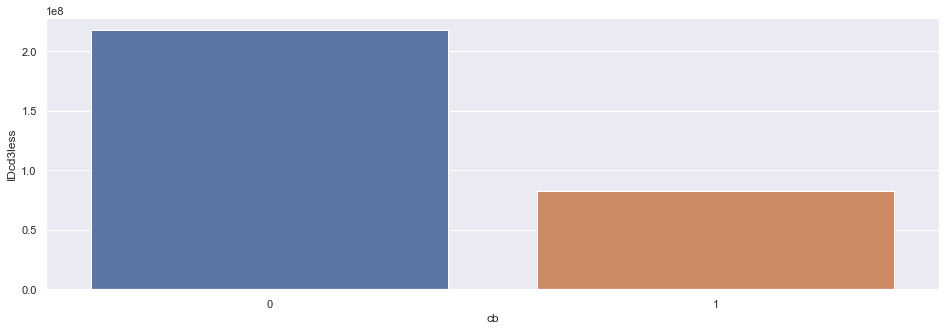

In [237]:
cb_grouped = time_dep_df2.groupby(['cb'])['IDcd3less', 'IDcd3t12s','IDcd1t3s','IDcdov3s'].sum()
cb_grouped.reset_index(inplace=True)

sns.barplot(x='cb', y='IDcd3less', data=cb_grouped)


## Count number of community banks

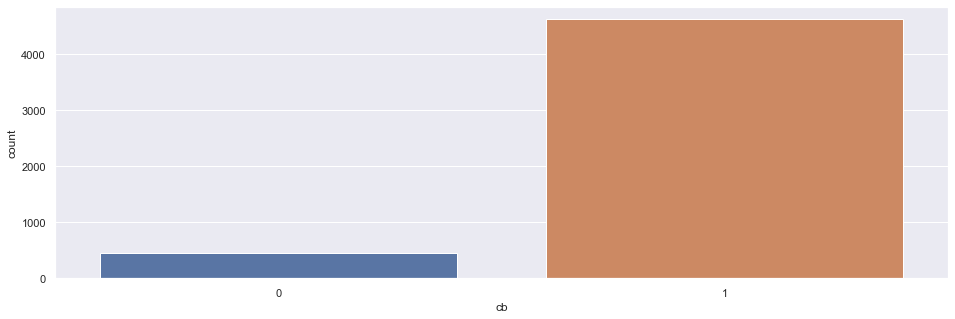

In [175]:


time_dep_df2['cb'].value_counts()

sns.countplot(time_dep_df2['cb'])

In [238]:

newyork = fdic['state'] == 'NY'

fdic['Community_Banks']
#Community Banks column is boolean

fdic.loc[newyork & fdic['Community_Banks']==1]



,cert,docket,fed_rssd,rssdhcr,name,city,state,zip,repdte,rundate,bkclass,address,namehcr,offdom,offfor,stmult,specgrp,subchaps,county,cbsa_metro,cbsa_metro_name,estymd,insdate,effdate,mutual,parcert,trust,regagnt,insagnt1,fdicdbs,fdicsupv,fldoff,fed,occdist,otsregnm,offoa,Community_Banks,inst.webaddr,Total_Deposits,depdom,idtrni,idtrngov,idtrnmu,idtrcomb,idtrnfc,idtrnfg,depfor,Transaction_Accounts,Demand_Deposit,Non-Transaction_Accounts,Money_Market_Deposit_Accounts,Other_Savings_Accounts,Time_Deposits,Time_and_Savings_Deposits,Non-Interest_Bearing,Interest-Bearing,Retail_Deposits,depins,irakeogh,bro,broins,DEPLSNB
26,32257,8059,762773,NaN,ABACUS FEDERAL SAVINGS BANK,New York,NY,10013,6/30/2020,8/17/2020,SA,6 Bowery,NaN,6,0,1,5,0,New York,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",11/29/1984,11/29/1984,2/23/2012,Stock,0,0,OCC,DIF,New York,NEW YORK,New York City,New York,Northeastern,Northeast,0,1,www.abacusbank.com,316046,316046,316047,0,0,0,0,0,NaN,91580,86156.0,224467,17874.0,75026.0,131566.0,229891.0,91175.0,224871.0,247101.0,279597,3774.0,60058.0,60058.0,9807.0
40,28380,1473,101671,2467474.0,ADIRONDACK BANK,Utica,NY,13501,6/30/2020,8/17/2020,SM,185 Genesee St.,ADIRONDACK BCORP INC,19,0,0,4,0,Oneida,46540.0,"Utica-Rome, NY",1/1/1898,1/25/1936,1/1/2014,Stock,0,0,FED,DIF,New York,NEW YORK,Syracuse,New York,Northeastern,Northeast,0,1,www.adirondackbank.com,785122,785122,578324,0,206799,0,0,0,NaN,82801,69495.0,702322,38965.0,546382.0,116975.0,715628.0,284757.0,500365.0,677900.0,527428,4151.0,25129.0,25129.0,0.0
51,9831,0,414102,NaN,ALDEN STATE BANK,Alden,NY,14004,6/30/2020,8/17/2020,SM,13216 Broadway,NaN,2,0,0,4,0,Erie,15380.0,"Buffalo-Cheektowaga-Niagara Falls, NY",10/5/1916,1/1/1934,5/1/2009,Stock,0,0,FED,DIF,New York,NEW YORK,Syracuse,New York,Northeastern,Northeast,0,1,WWW.ALDENSTATE.COM,341030,341030,314927,2,26101,0,0,0,NaN,128938,92300.0,212092,60225.0,83024.0,68843.0,248730.0,92300.0,248730.0,325170.0,269064,16543.0,0.0,0.0,0.0
69,58424,0,3633173,NaN,ALMA BANK,Astoria,NY,11102,6/30/2020,8/17/2020,NM,28-31 31st St.,NaN,12,0,1,4,0,Queens,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",9/12/2007,9/12/2007,7/6/2017,Stock,0,0,FDIC,DIF,New York,NEW YORK,New York City,New York,Northeastern,Northeast,0,1,http://www.almabank.com,1097411,1097411,1089871,0,460,7080,0,0,NaN,312080,281611.0,785331,174186.0,83626.0,527519.0,815800.0,290536.0,806874.0,940482.0,864751,36544.0,119581.0,119581.0,6574.0
72,35377,0,2889227,NaN,ALPINE CAPITAL BANK,New York,NY,10019,6/30/2020,8/17/2020,NM,"680 5th Ave, 7th Fl.",NaN,1,0,0,4,1,New York,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",3/1/2000,3/1/2000,5/26/2010,Stock,0,0,FDIC,DIF,New York,NEW YORK,New York City,New York,Northeastern,Northeast,0,1,https://www.alpinecapitalbank.com,199009,199009,195795,0,2740,474,0,0,NaN,100026,76906.0,98983,67749.0,1215.0,30019.0,122103.0,76906.0,122103.0,171490.0,75702,534.0,8997.0,8997.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,58541,0,3620922,4989907.0,USNY BANK,Geneva,NY,14456,6/30/2020,8/17/2020,NM,389 Hamilton St.,UPSTATE NEW YORK BCORP INC,4,0,0,2,0,Ontario,40380.0,"Rochester, NY",7/31/2007,7/31/2007,7/31/2007,Stock,0,0,FDIC,DIF,New York,NEW YORK,Syracuse,New York,Northeastern,Northeast,0,1,www.usnybank.com,412831,412831,326576,21833,36225,28197,0,0,NaN,108445,75723.0,304386,70488.0,16810.0,217088.0,337108.0,75750.0,337081.0,343307.0,320927,10209.0,36399.0,36399.0,32230.0
4894,34565,0,2631323,3165508.0,VICTORY STATE BANK,Staten Island,NY,10308,6/30/2020,8/17/2020,NM,4142 Hylan Blvd.,VSB BCORP INC,6,0,0,4,0,Richmond,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",11/14/1997,11/14/1997,8/6/2010,Stock,0,0,FDIC,DIF,New York,NEW YORK,New York City,New York,Northeastern,Northeast,0,1,www.victorystatebank.com,362494,362494,331503,0,30991,0,0

In [52]:
fdic_copy1 = fdic[['name','Total_Deposits']]
fdic_copy1.info()
fdic_copy1['Total_Deposits'].nlargest(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            5075 non-null   object
 1   Total_Deposits  5075 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 79.4+ KB


2594    2050074000
263     1820512000
4969    1501208000
826     1244403000
4765     425279286
4748     391221000
3362     365224263
3940     331863100
4039     308354000
676      304254625
Name: Total_Deposits, dtype: int64

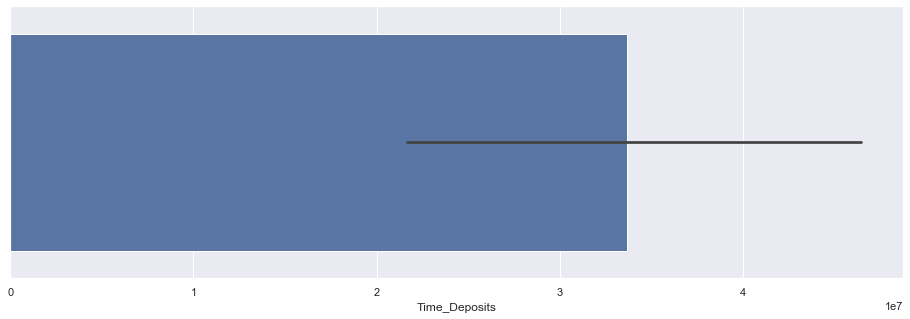

In [353]:
fdic_states = fdic.groupby(['state'])['Time_Deposits'].sum()
fdic_states

sns.barplot(fdic_states)

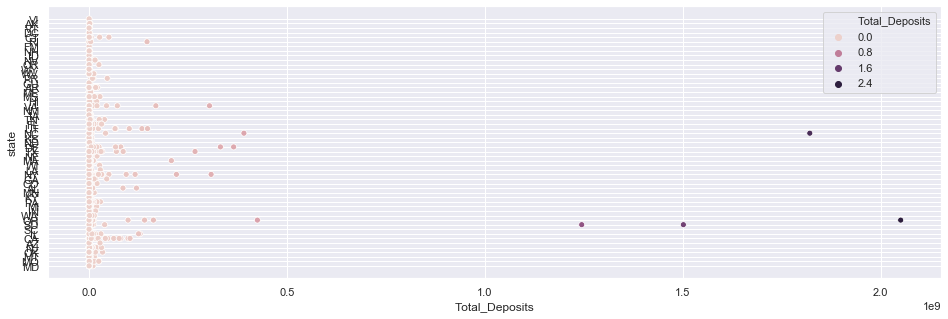

In [25]:
sns.set(rc={'figure.figsize': (16,5)})


sns.scatterplot(x='Total_Deposits', y='state', data=fdic, hue='Total_Deposits')



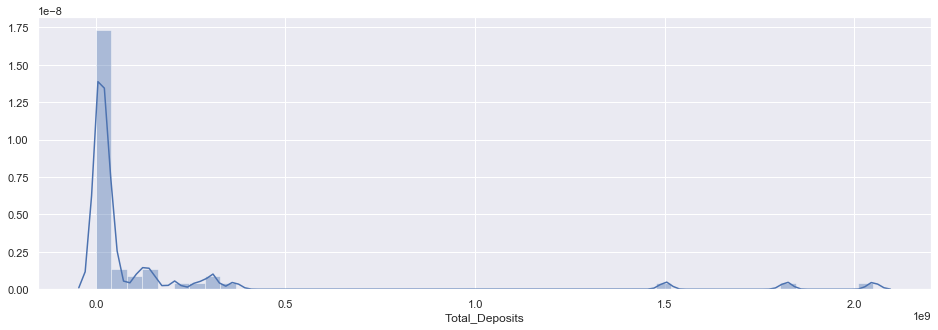

In [57]:
max_total_dep_state = fdic.groupby(['state'])['Total_Deposits'].max()


sns.distplot(max_total_dep_state)


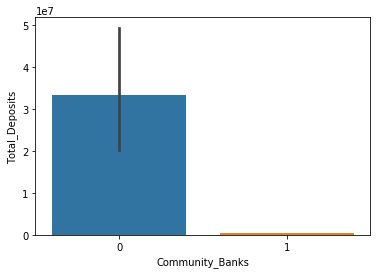

In [29]:
sns.barplot(x='Community_Banks', y='Total_Deposits',data=fdic)

In [25]:
fdic.to_csv('fdic_copy.csv')

In [312]:
time_dep_q22020.to_csv('CDs_Q2_2020_copy.csv')

In [313]:
time_dep_q12020.to_csv('CDs_Q1_2020_copy.csv')

In [314]:
time_dep_q42019.to_csv('CDs_Q4_2019_copy.csv')

In [315]:
time_dep_q32019.to_csv('CDs_Q3_2019_copy.csv')

In [316]:
time_dep_q22019.to_csv('CDs_Q2_2019_copy.csv')

In [317]:
time_dep_q12019.to_csv('CDs_Q1_2019_copy.csv')

In [318]:
time_dep_q42018.to_csv('CDs_Q4_2018_copy.csv')

In [319]:
time_dep_q32018.to_csv('CDs_Q3_2018_copy.csv')

In [320]:
time_dep_q22018.to_csv('CDs_Q2_2018_copy.csv')

In [321]:
time_dep_q12018.to_csv('CDs_Q1_2018_copy.csv')